<a href="https://colab.research.google.com/github/ameyadalvi84/CIFAR10/blob/master/CIFAR10_with_VGG_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras as K
from keras import models, layers
from keras.utils import to_categorical
from keras.applications import VGG16,ResNet50,InceptionV3
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import regularizers

%matplotlib inline

In [24]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
print("Shape of train_images : ", train_images.shape)
print("Max value in train_images : ", train_images.max())
print("Min value in train_images : ", train_images.min())

Shape of train_images :  (50000, 32, 32, 3)
Max value in train_images :  255
Min value in train_images :  0


In [0]:
train_images = train_images.astype('float32') / 255.
train_labels_cat = to_categorical(train_labels)
test_images = test_images.astype('float32') / 255.
test_labels_cat = to_categorical(test_labels)

In [0]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (32,32,3))
conv_base.trainable = False

#conv_base1 = ResNet50(weights = 'imagenet',
#                     include_top = False,
#                      input_shape = (32,32,3))

#conv_base3 = InceptionV3(weights='imagenet',
#                         include_top = False,
#                         input_shape = (32,32,3))

#conv_base.summary()
#conv_base1.trainable = False

In [0]:
l2 = 0.0005
def build_model():
  model = models.Sequential()
  #layer 1
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2),input_shape=(32,32,3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D())

  # layer 2
  model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D())

  #layer 3
  model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D())

  #layer 4
  model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D())

  # layer 5
  model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D())

  model.add(layers.Dropout(0.5))
  
  # layer for softmax
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(l2)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10,activation='sigmoid'))
  return model

def build_resnet():
  model = models.Sequential()
  model.add(conv_base1)
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10,activation='sigmoid'))
  return model

In [30]:
from keras import optimizers

learning_rate = 0.1
lr_drop = 20
lr_decay = 1e-6
def lr_schdl(epoch):
  return learning_rate * (0.5 ** (epoch // lr_drop))

reduce_lr = K.callbacks.LearningRateScheduler(lr_schdl)

num_val_records = 2000
val_images = train_images[:num_val_records]
val_labels = train_labels_cat[:num_val_records]
partial_train_images = train_images[num_val_records:]
partial_train_labels = train_labels_cat[num_val_records:]
model1 = build_model()
#model1 = build_resnet()
model1.compile(optimizer=optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_53 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_41 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_54 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 128)      

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    horizontal_flip= True,
    fill_mode="nearest")

train_generator = train_datagen.flow(partial_train_images,
                                     partial_train_labels,
                                     batch_size = 128)
test_datagen = ImageDataGenerator()

#validation_generator = test_datagen.flow(val_images,
#                                         val_labels,
#                                         batch_size=32)

In [0]:
batch_size = 128
history = model1.fit_generator(train_generator,
                               steps_per_epoch = train_images.shape[0] // batch_size,
                               epochs=250,
                               validation_data = (val_images,val_labels),
                               #validation_steps=100,
                               callbacks = [reduce_lr])

Epoch 1/250
390/390 [==============================] - 35s 88ms/step - loss: 10.2334 - accuracy: 0.1040 - val_loss: 7.7377 - val_accuracy: 0.0960
Epoch 2/250
390/390 [==============================] - 31s 78ms/step - loss: 6.0697 - accuracy: 0.1064 - val_loss: 4.7784 - val_accuracy: 0.0960
Epoch 3/250
390/390 [==============================] - 31s 78ms/step - loss: 3.9999 - accuracy: 0.1168 - val_loss: 3.5054 - val_accuracy: 0.1390
Epoch 4/250
390/390 [==============================] - 30s 78ms/step - loss: 2.9151 - accuracy: 0.1740 - val_loss: 2.8153 - val_accuracy: 0.1715
Epoch 5/250
390/390 [==============================] - 31s 78ms/step - loss: 2.4514 - accuracy: 0.1870 - val_loss: 2.8583 - val_accuracy: 0.1155
Epoch 6/250
390/390 [==============================] - 31s 78ms/step - loss: 2.2713 - accuracy: 0.2140 - val_loss: 2.4686 - val_accuracy: 0.2000
Epoch 7/250
390/390 [==============================] - 30s 78ms/step - loss: 2.2592 - accuracy: 0.1988 - val_loss: 2.3404 - val_a

In [0]:
from keras.models import load_model
model1.save_weights('cifar10vgg_arivx.h5')
#model2 = build_model()
#model2.load_weights('cifar10vgg_arivx.h5')

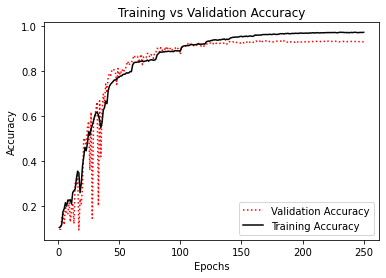

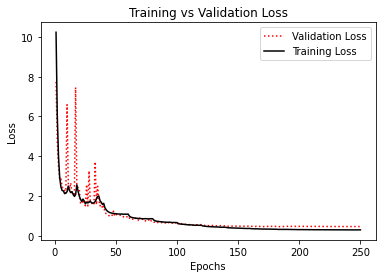

In [31]:
history_dict = history.history

val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
acc = history_dict['accuracy']
loss = history_dict['loss']

epoch_num = range(1, len(acc) + 1)

plt.plot(epoch_num,val_acc,'r:',label="Validation Accuracy")
plt.plot(epoch_num,acc,'k-',label="Training Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epoch_num,val_loss,'r:',label="Validation Loss")
plt.plot(epoch_num,loss,'k-',label="Training Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [40]:
#test_generator = test_datagen.flow(test_images,
#                              test_labels_cat,
#                              batch_size=32)


result = model1.evaluate(test_images,test_labels_cat)
result

10000/10000 [==============================] - 4s 351us/step


[0.5064011637687683, 0.9210000038146973]

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred = model1.predict(test_images)
y_pred = np.argmax(Y_pred, axis=1)

In [42]:
print("Confusion Matrix")
print(confusion_matrix(test_labels,y_pred))

Confusion Matrix
[[936   5   9   4   2   0   2   3  27  12]
 [  3 965   0   1   0   0   1   0   8  22]
 [ 15   1 912  13  17   6  20   9   5   2]
 [ 10   2  26 819  20  66  42   7   5   3]
 [  3   0  14  14 927   9  20  13   0   0]
 [  7   1  17  84  26 818  27  15   1   4]
 [  3   0  14   9   3   0 969   0   2   0]
 [  5   0  10   7  21  13   1 943   0   0]
 [ 15   5   2   4   1   0   0   1 969   3]
 [  5  26   3   1   1   1   3   1   7 952]]


In [43]:
print("Classification Report")
print(classification_report(test_labels,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1000
           1       0.96      0.96      0.96      1000
           2       0.91      0.91      0.91      1000
           3       0.86      0.82      0.84      1000
           4       0.91      0.93      0.92      1000
           5       0.90      0.82      0.86      1000
           6       0.89      0.97      0.93      1000
           7       0.95      0.94      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

